In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics
import sklearn.ensemble as ske

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
titanic_df = pd.read_csv("train.csv")

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Learn Data :: มีใครรอดชีวิตบ้าง ?

In [4]:
titanic_df['Survived'].mean()

0.38383838383838381

In [23]:
titanic_df[].groupby(["Pclass", "Survived"]).mean()

PassengerId        Age     SibSp     Parch       Fare
Pclass Survived                                                       
1      0          410.300000  43.695312  0.287500  0.300000  64.684008
       1          491.772059  35.368197  0.492647  0.389706  95.608029
2      0          452.123711  33.544444  0.319588  0.144330  19.412328
       1          439.080460  25.901566  0.494253  0.643678  22.055700
3      0          453.580645  26.555556  0.672043  0.384409  13.669364
       1          394.058824  20.646118  0.436975  0.420168  13.694887

In [6]:
pclass_sex = titanic_df.groupby(["Pclass", "Sex"]).mean()
pclass_sex

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

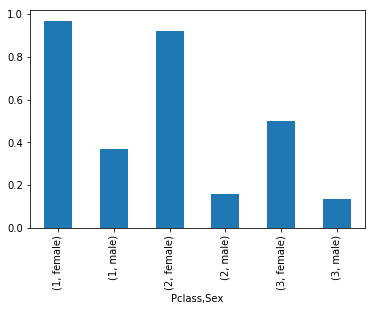

In [7]:
pclass_sex["Survived"].plot.bar()

In [8]:
group_age = pd.cut(titanic_df["Age"], 
                   np.arange(0, 90, 10))
age_grouping = titanic_df.groupby(group_age).mean()
age_grouping

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,,
"(0, 10]",430.843750,0.593750,2.640625,4.268281,1.843750,1.421875,30.434439
"(10, 20]",447.660870,0.382609,2.530435,17.317391,0.591304,0.391304,29.529531
"(20, 30]",428.682609,0.365217,2.386957,25.423913,0.321739,0.239130,28.306719
"(30, 40]",468.690323,0.445161,2.090323,35.051613,0.374194,0.393548,42.496100
"(40, 50]",483.500000,0.383721,1.918605,45.372093,0.372093,0.430233,41.163181
"(50, 60]",449.809524,0.404762,1.523810,54.892857,0.309524,0.309524,44.774802
"(60, 70]",430.882353,0.235294,1.529412,63.882353,0.176471,0.352941,45.910782
"(70, 80]",438.200000,0.200000,1.800000,73.300000,0.000000,0.000000,25.936680


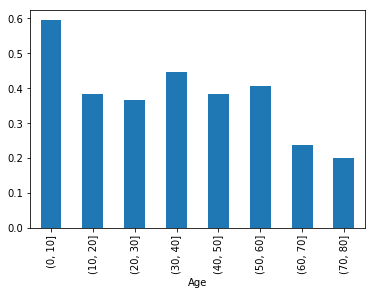

In [9]:
age_grouping["Survived"].plot.bar()

## Start with Machine Learning

In [10]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [11]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [32]:
titanic_df[['Pclass', 'Survived']].groupby(
    ['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [31]:
titanic_df.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [35]:
titanic_df[['Pclass', 'Survived']].groupby(
    ['Pclass'], 
    as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [36]:
titanic_df[['Sex', 'Survived']].groupby(
    ['Sex'], 
    as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [42]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df[['FamilySize', 'Survived']].groupby(
     ['FamilySize']
).mean()

,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [44]:
import seaborn as sns
import re

In [53]:
titanic_df.Name.tail()

886                       Montvila, Rev. Juozas
887                Graham, Miss. Margaret Edith
888    Johnston, Miss. Catherine Helen "Carrie"
889                       Behr, Mr. Karl Howell
890                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [60]:
titanic_df['Title'] = titanic_df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
titanic_df[['Title', 'Survived']].groupby(['Title']).count()

,Survived
Title,
Capt,1
Col,2
Countess,1
Don,1
Dr,7
Jonkheer,1
Lady,1
Major,2
Master,40


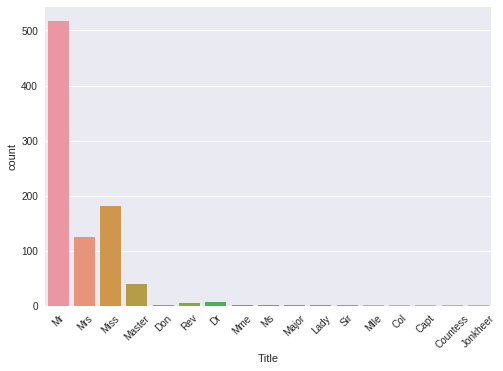

In [57]:
sns.countplot(x='Title', data=titanic_df);
plt.xticks(rotation=45);

In [59]:
pd.crosstab(titanic_df['Title'], titanic_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


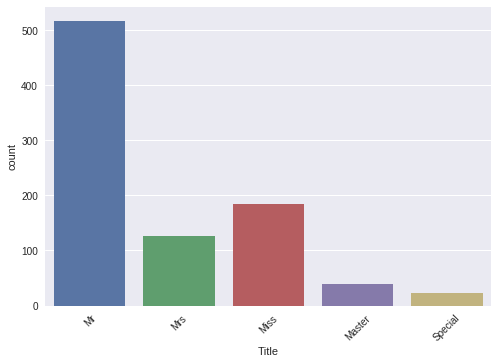

In [61]:
titanic_df['Title'] = titanic_df['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
titanic_df['Title'] = titanic_df['Title'].replace(['Don', 'Dona', 'Rev', 'Dr',
                                            'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Special')
sns.countplot(x='Title', data=titanic_df);
plt.xticks(rotation=45);

In [62]:
titanic_df.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,Prefix
0,0,3,male,22.0,1,0,7.2500,S,2,Mr,Mr
1,1,1,female,38.0,1,0,71.2833,C,2,Mrs,Mrs
2,1,3,female,26.0,0,0,7.9250,S,1,Miss,Miss
3,1,1,female,35.0,1,0,53.1000,S,2,Mrs,Mrs
4,0,3,male,35.0,0,0,8.0500,S,1,Mr,Mr


In [76]:
print('Survived =>', titanic_df.Survived.unique())
print('Pclass =>', titanic_df.Pclass.unique())
print('Sex =>', titanic_df.Sex.unique())
print('SibSp =>', titanic_df.SibSp.unique())
print('Parch =>', titanic_df.Parch.unique())
print('Embarked =>', titanic_df.Embarked.unique())

Survived => [0 1]
Pclass => [3 1 2]
Sex => ['male' 'female']
SibSp => [1 0 3 4 2 5 8]
Parch => [0 1 2 5 3 4 6]
Embarked => ['S' 'C' 'Q' nan]


In [77]:
titanic_df.Age.unique()

array([ 22.  ,  38.  ,  26.  ,  35.  ,    nan,  54.  ,   2.  ,  27.  ,
        14.  ,   4.  ,  58.  ,  20.  ,  39.  ,  55.  ,  31.  ,  34.  ,
        15.  ,  28.  ,   8.  ,  19.  ,  40.  ,  66.  ,  42.  ,  21.  ,
        18.  ,   3.  ,   7.  ,  49.  ,  29.  ,  65.  ,  28.5 ,   5.  ,
        11.  ,  45.  ,  17.  ,  32.  ,  16.  ,  25.  ,   0.83,  30.  ,
        33.  ,  23.  ,  24.  ,  46.  ,  59.  ,  71.  ,  37.  ,  47.  ,
        14.5 ,  70.5 ,  32.5 ,  12.  ,   9.  ,  36.5 ,  51.  ,  55.5 ,
        40.5 ,  44.  ,   1.  ,  61.  ,  56.  ,  50.  ,  36.  ,  45.5 ,
        20.5 ,  62.  ,  41.  ,  52.  ,  63.  ,  23.5 ,   0.92,  43.  ,
        60.  ,  10.  ,  64.  ,  13.  ,  48.  ,   0.75,  53.  ,  57.  ,
        80.  ,  70.  ,  24.5 ,   6.  ,   0.67,  30.5 ,   0.42,  34.5 ,  74.  ])

In [78]:
titanic_df.Fare.unique()

array([   7.25  ,   71.2833,    7.925 ,   53.1   ,    8.05  ,    8.4583,
         51.8625,   21.075 ,   11.1333,   30.0708,   16.7   ,   26.55  ,
         31.275 ,    7.8542,   16.    ,   29.125 ,   13.    ,   18.    ,
          7.225 ,   26.    ,    8.0292,   35.5   ,   31.3875,  263.    ,
          7.8792,    7.8958,   27.7208,  146.5208,    7.75  ,   10.5   ,
         82.1708,   52.    ,    7.2292,   11.2417,    9.475 ,   21.    ,
         41.5792,   15.5   ,   21.6792,   17.8   ,   39.6875,    7.8   ,
         76.7292,   61.9792,   27.75  ,   46.9   ,   80.    ,   83.475 ,
         27.9   ,   15.2458,    8.1583,    8.6625,   73.5   ,   14.4542,
         56.4958,    7.65  ,   29.    ,   12.475 ,    9.    ,    9.5   ,
          7.7875,   47.1   ,   15.85  ,   34.375 ,   61.175 ,   20.575 ,
         34.6542,   63.3583,   23.    ,   77.2875,    8.6542,    7.775 ,
         24.15  ,    9.825 ,   14.4583,  247.5208,    7.1417,   22.3583,
          6.975 ,    7.05  ,   14.5   ,   15.0458, 

In [89]:
titanic_df['NewAge'] = titanic_df.Age.fillna(titanic_df.Age.median())

In [90]:
titanic_df[['Age', 'NewAge']].describe()

,Age,NewAge
count,714.000000,891.000000
mean,29.699118,29.361582
std,14.526497,13.019697
min,0.420000,0.420000
25%,20.125000,22.000000
50%,28.000000,28.000000
75%,38.000000,35.000000
max,80.000000,80.000000


In [91]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null object
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      889 non-null object
FamilySize    891 non-null int64
Title         891 non-null object
Prefix        891 non-null object
NewAge        891 non-null float64
dtypes: float64(3), int64(5), object(4)
memory usage: 83.6+ KB


In [92]:
titanic_df[['Embarked']].describe()

,Embarked
count,889
unique,3
top,S
freq,644


In [93]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
titanic_df[['Embarked']].describe()

,Embarked
count,891
unique,3
top,S
freq,646


In [104]:
titanic_df['CategoricalFare'] = pd.qcut(titanic_df['Fare'], 4, labels=False)
titanic_df[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean()

,CategoricalFare,Survived
0,0,0.197309
1,1,0.303571
2,2,0.454955
3,3,0.581081


In [100]:
titanic_df[['CategoricalFare']].describe()

,CategoricalFare
count,891.000000
mean,2.475870
std,1.724976
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


In [117]:
titanic_df['CategoricalAge'] = pd.qcut(titanic_df['NewAge'], 4, labels=False)
titanic_df[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean()

,CategoricalAge,Survived
0,0,0.424242
1,1,0.331169
2,2,0.437037
3,3,0.382488


In [114]:
titanic_df = titanic_df.drop(['Age', 'Fare'], axis=1)
titanic_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,Title,Prefix,NewAge,CategoricalFare,CategoricalAge
0,0,3,male,1,0,S,2,Mr,Mr,22.0,0,1.0
1,1,1,female,1,0,C,2,Mrs,Mrs,38.0,3,2.0
2,1,3,female,0,0,S,1,Miss,Miss,26.0,1,1.0
3,1,1,female,1,0,S,2,Mrs,Mrs,35.0,3,2.0
4,0,3,male,0,0,S,1,Mr,Mr,35.0,1,2.0


In [119]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived           891 non-null int64
Pclass             891 non-null int64
Sex                891 non-null object
SibSp              891 non-null int64
Parch              891 non-null int64
Embarked           891 non-null object
FamilySize         891 non-null int64
Title              891 non-null object
Prefix             891 non-null object
NewAge             891 non-null float64
CategoricalFare    891 non-null int64
CategoricalAge     891 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 83.6+ KB


In [120]:
data_dummy = pd.get_dummies(titanic_df, drop_first=True)
data_dummy.head()

,Survived,Pclass,SibSp,Parch,FamilySize,NewAge,CategoricalFare,CategoricalAge,Sex_male,Embarked_Q,...,Prefix_Major,Prefix_Master,Prefix_Miss,Prefix_Mlle,Prefix_Mme,Prefix_Mr,Prefix_Mrs,Prefix_Ms,Prefix_Rev,Prefix_Sir
0,0,3,1,0,2,22.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,1,0,2,38.0,3,3,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,3,0,0,1,26.0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,1,0,2,35.0,3,2,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,3,0,0,1,35.0,1,2,1,0,...,0,0,0,0,0,1,0,0,0,0
